In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
embeddings = torch.load("/content/drive/MyDrive/GI_Project/AEEmbeddingsByFdcIDV5.pt")


In [12]:
foodData = pd.read_csv(f"/content/drive/MyDrive/GI_Project/USDA_Nutrition_DataV2.csv")
# Drop all columns with 50% or more NaN values
foodData = foodData.dropna(thresh=foodData.shape[0]*0.2, axis=1)
# Drop all rows without at least 90% non NaN data
foodData = foodData.dropna(thresh=foodData.shape[1]*0.8, axis=0)
foodData.shape

(313674, 19)

In [13]:
foodDataGi = pd.read_csv(f"/content/drive/MyDrive/GI_Project/NutritionDataUsdaGiMatched.csv")
gi_data = pd.read_csv("/content/drive/MyDrive/GI_Project/gi_data.csv", delimiter="\t")
foodDataGi['GI'] = gi_data['GI']
foodDataGi

,gi_name,usda_name,score,fdc_id,Protein [G],Total lipid (fat) [G],"Carbohydrate, by difference [G]",Ash [G],Energy [KCAL],Starch [G],...,SFA 12:0 [G],PUFA 18:2 [G],"Fatty acids, total monounsaturated [G]","Fatty acids, total polyunsaturated [G]","PUFA 18:2 n-6 c,c [G]",Epigallocatechin-3-gallate [MG],Inulin [G],"PUFA 18:3 n-3 c,c,c (ALA) [G]","Sugars, total including NLEA [G]",GI
0,"Cake, NS, decreased GI variant, sugar-to-flour...",Morrison's Hi Ratio Cake Flour,27.767183,2492814,6.67,0.00,80.00,NaN,367.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,20
1,"Carrot cake, prepared with wheat flour and coc...","COCONUT CARROT CAKE VEGAN MUFFIN, COCONUT CARR...",30.056784,2077739,3.64,16.36,56.36,NaN,382.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.73,37
2,Chocolate cake made from packet mix with choco...,CHOCOLATE CAKE MIX,30.066408,1860807,6.98,2.33,81.40,NaN,356.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.21,38
3,Chocolate mudcake,CHOCOLATE CHEESECAKE,33.959480,1665581,5.05,24.24,34.34,NaN,374.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.23,43
4,Christmas fruit cake,CHRISTMAS CAKE,35.892059,2484307,0.33,0.11,3.86,NaN,29.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.10,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4227,"Wholemeal bread (85 g), consumed with boiled e...",BREAD & 70% DARK CHOCOLATE,24.796761,2136799,7.55,35.85,49.06,NaN,472.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.30,55
4228,ZANHUO/ManaGI Egg Yolk Pastry,"APOLLO, FILLO PHYLLO PASTRY SHEETS",27.676426,1477116,8.33,3.12,54.17,NaN,271.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.08,28
4229,ZANHUO/ManaGI Matcha Crispbread,"CRISPBREAD, SESAME",30.705032,2024296,14.81,11.11,66.67,NaN,370.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,53
4230,ZANHUO/ManaGI Oat Bread (Americano Flavor),COUNTRY OAT BREAD MIX,30.381863,2011686,6.98,2.33,79.07,NaN,372.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.98,42


In [14]:
idsWithEmbedAndGi = foodDataGi[foodDataGi['fdc_id'].isin(embeddings.keys())]['fdc_id']

embeddingDf = pd.DataFrame.from_dict({k: embeddings[k] for k in idsWithEmbedAndGi}, orient='index')
embeddingDf = embeddingDf.merge(foodDataGi, left_index=True, right_on='fdc_id')
embeddingDf

,0,1,2,3,4,5,6,7,gi_name,usda_name,...,SFA 12:0 [G],PUFA 18:2 [G],"Fatty acids, total monounsaturated [G]","Fatty acids, total polyunsaturated [G]","PUFA 18:2 n-6 c,c [G]",Epigallocatechin-3-gallate [MG],Inulin [G],"PUFA 18:3 n-3 c,c,c (ALA) [G]","Sugars, total including NLEA [G]",GI
0,2.611673,1.790688,0.240555,1.297896,0.124967,0.0,1.797107,0.0,"Cake, NS, decreased GI variant, sugar-to-flour...",Morrison's Hi Ratio Cake Flour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,20
2095,2.611673,1.790688,0.240555,1.297896,0.124967,0.0,1.797107,0.0,"Cake, NS, sugar-to-flour ratio: 2.25 (Bakery S...",Morrison's Hi Ratio Cake Flour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,51
1,2.211049,1.366467,0.562523,0.841992,1.486318,0.0,1.499829,0.0,"Carrot cake, prepared with wheat flour and coc...","COCONUT CARROT CAKE VEGAN MUFFIN, COCONUT CARR...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.73,37
2,2.222159,1.364657,0.699528,1.004792,1.837542,0.0,1.379605,0.0,Chocolate cake made from packet mix with choco...,CHOCOLATE CAKE MIX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.21,38
3,1.741191,1.092358,0.689959,0.484354,1.178529,0.0,1.827797,0.0,Chocolate mudcake,CHOCOLATE CHEESECAKE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.23,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4227,2.235621,1.495673,0.291737,0.761903,0.986158,0.0,1.684140,0.0,"Wholemeal bread (85 g), consumed with boiled e...",BREAD & 70% DARK CHOCOLATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.30,55
4228,1.925061,1.589984,0.466444,1.117926,2.439596,0.0,1.484611,0.0,ZANHUO/ManaGI Egg Yolk Pastry,"APOLLO, FILLO PHYLLO PASTRY SHEETS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.08,28
4229,1.780526,1.249575,1.070579,1.220410,1.634529,0.0,1.769355,0.0,ZANHUO/ManaGI Matcha Crispbread,"CRISPBREAD, SESAME",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,53
4230,2.166523,1.521210,0.491061,1.043000,1.915303,0.0,1.443563,0.0,ZANHUO/ManaGI Oat Bread (Americano Flavor),COUNTRY OAT BREAD MIX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.98,42


In [16]:
X = embeddingDf.iloc[:,:8].to_numpy()
y = embeddingDf['GI'].to_numpy()

In [17]:
shuffle=np.random.permutation(len(y))

In [19]:
#fill these in
cutoff=400
x_train=X[cutoff:]
y_train=y[cutoff:]
x_test=X[:cutoff]
y_test=y[:cutoff]

In [20]:
#model goes here

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [22]:
model = Sequential()
# model.add(Dense(x_train.shape[1], input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(x_train.shape[1], input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(1, input_dim=x_train.shape[1], activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam')#Adam(learning_rate=0.0005))

In [32]:
correls=[]
for i in range(0,10):
    history=model.fit(x_train, np.array(y_train), epochs=1, batch_size=32, validation_split=.2)
    y_hat=model.predict(x_test)
    correls.append(scipy.stats.pearsonr(y_test,y_hat.squeeze()))

13/13 [==============================] - 0s 2ms/step


In [24]:
isolate_correls=[correl.statistic for correl in correls]

In [25]:
isolate_correls

[0.046564020865229164,
 0.10067927160977666,
 0.1633870423893397,
 0.21168812749744284,
 0.24013345032574704,
 0.25325121966633213,
 0.25852755562128127,
 0.2607428403521678,
 0.2620368469199068,
 0.26337468547332993]

In [26]:
#correlation workshop/visualizer over iterations

ValueError: ignored

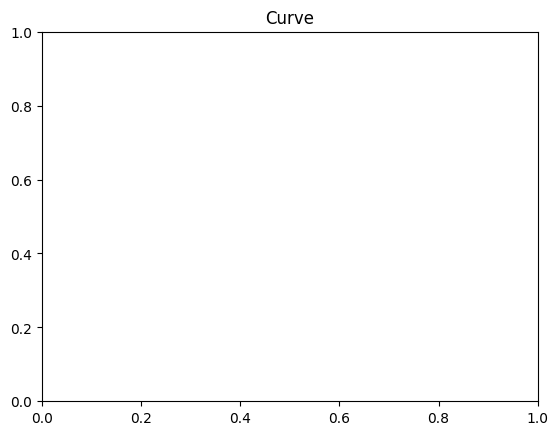

In [27]:
plt.title("Curve")
# plt.plot(range(len(history.history['loss'])),history.history['loss'])
plt.plot(range(1),isolate_correls)

plt.show()

In [28]:
def cos_cdist(x1 : torch.Tensor, x2 : torch.Tensor, eps : float = 1e-8):
    eps = torch.tensor(eps, device=x1.device)
    norms1 = x1.norm(dim=1).unsqueeze_(1).max(eps)
    norms2 = x2.norm(dim=1).unsqueeze_(0).max(eps)
    cdist = x1 @ x2.T
    cdist.div_(norms1).div_(norms2)
    return cdist

In [29]:
#analysis

In [30]:
scipy.stats.pearsonr(y_test,y_hat.squeeze())

PearsonRResult(statistic=0.26337468547332993, pvalue=9.007831236045252e-08)

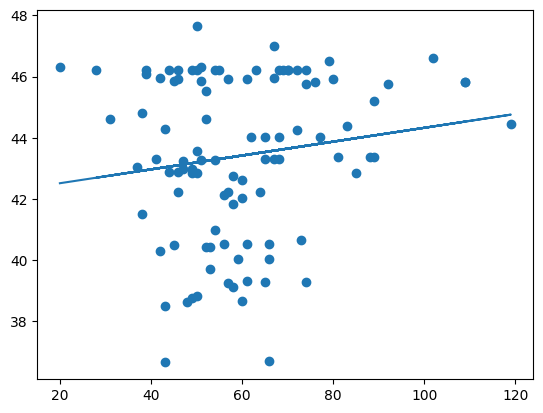

In [31]:
cap=100#len(y_test)
m,b = np.polyfit(y_test[:cap],y_hat[:cap],1)
plt.scatter(y_test[:cap],y_hat[:cap])
plt.plot(y_test[:cap], m*y_test[:cap]+b)
plt.show()

In [ ]:
np.expand_dims(embedding,1).shape

(384, 1)

In [ ]:
diff=abs(y_test-y_hat.squeeze())

x_train_torch=torch.tensor(x_train)
x_test_torch=torch.tensor(x_test)

#get closest match similarities
candidate_qualities=[]
for index in range(len(x_test_torch)):
    embedding=x_test_torch[index]

    sims=cos_cdist(embedding.unsqueeze(0),x_train_torch).squeeze()
    sorted_sims=sims[torch.argsort(sims)]
    candidate_quality=sorted_sims[-2]
    candidate_qualities.append(candidate_quality)
candidate_qualities=np.array(candidate_qualities)

#make similarity bins across which to compare loss
bin_start=.35
bin_end=1
increment=.05

means=[]
counts=[]
while bin_start<bin_end:
    mask=np.logical_and(candidate_qualities>bin_start,candidate_qualities<bin_start+increment)
    means.append(np.mean(diff[mask]))
    counts.append(np.sum(mask))
    bin_start+=increment
#special case similarity==1
mask=candidate_qualities>=bin_end
means.append(np.mean(diff[mask]))
counts.append(np.sum(mask))

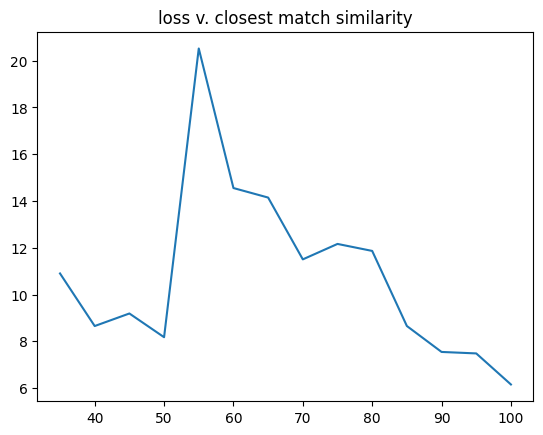

In [ ]:
plt.title("loss v. closest match similarity")
plt.plot(range(35,105,5),means)

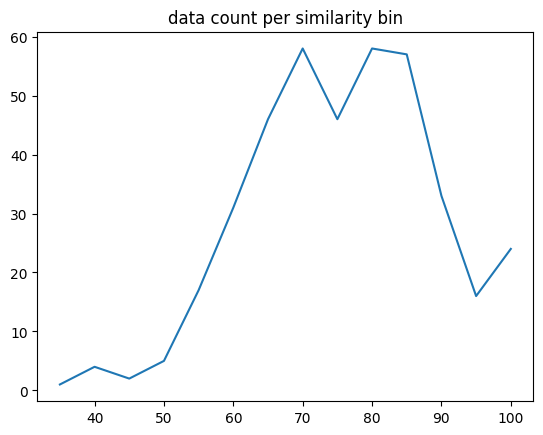

In [ ]:
plt.title("data count per similarity bin")
plt.plot(range(35,105,5),counts)